In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import utils.spike_utils as spike_utils
import utils.classifier_utils as classifier_utils
import utils.visualization_utils as visualization_utils

import os
import pandas as pd
import matplotlib

In [2]:
PRE_INTERVAL = 1300
POST_INTERVAL = 1500
INTERVAL_SIZE = 100
EVENT = "FeedbackOnset"

# output dir that was specified in the decode_features_with_pseudo.py
OUTPUT_DIR = "/data/patrick_res/pseudo"
HYAK_OUTPUT_DIR = "/data/patrick_res/hyak/pseudo"
SESSIONS_PATH = "/data/patrick_res/multi_sess/valid_sessions_rpe.pickle"

FEATURE_DIMS = ["Color", "Shape", "Pattern"]

### All units all trials baseline vs abstract

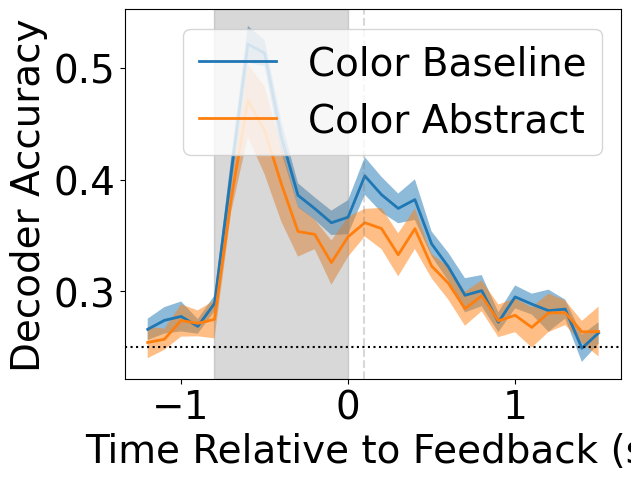

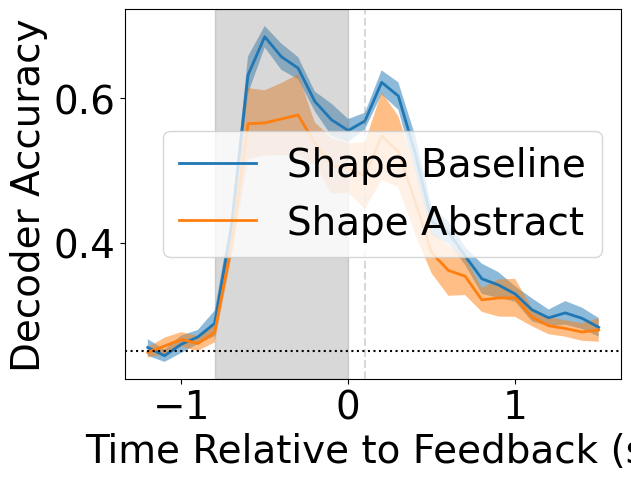

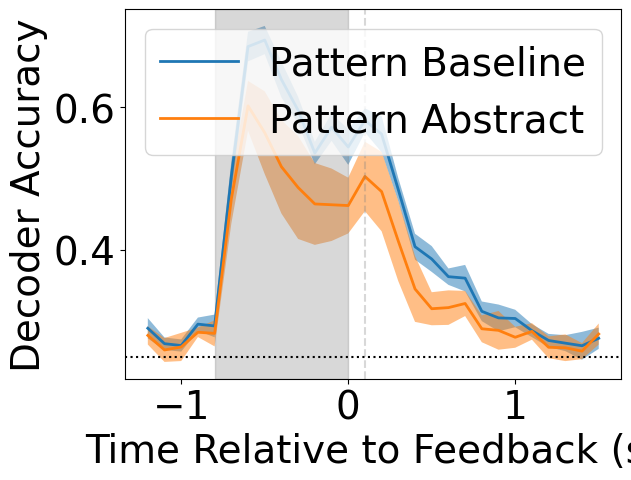

In [3]:
matplotlib.rcParams.update({'font.size': 28})
for feature_dim in FEATURE_DIMS:
    fig, ax = plt.subplots()

    baseline_accs = np.load(os.path.join(OUTPUT_DIR, f"{feature_dim}_rpe_sess_abstract_base_0.75_test_accs.npy"))
    abstract_accs = np.load(os.path.join(OUTPUT_DIR, f"{feature_dim}_rpe_sess_abstract_one_cond_test_accs.npy"))

    visualization_utils.visualize_accuracy_across_time_bins(
        baseline_accs,
        PRE_INTERVAL / 1000, POST_INTERVAL / 1000, INTERVAL_SIZE / 1000,  # by default these are in seconds
        ax,
        label=f"{feature_dim} Baseline",
        right_align=True, 
    )
    visualization_utils.visualize_accuracy_across_time_bins(
        abstract_accs,
        PRE_INTERVAL / 1000, POST_INTERVAL / 1000, INTERVAL_SIZE / 1000,  # by default these are in seconds
        ax,
        label=f"{feature_dim} Abstract",
        right_align=True, 
    )
    ax.legend()
    # add grey band for selection period
    ax.axvspan(-0.8, 0, alpha=0.3, color='gray')
    # add dotted line for feedback start
    ax.axvline(0.098, alpha=0.3, color='gray', linestyle='dashed')
    # add estimated chance
    ax.axhline(0.25, color='black', linestyle='dotted', label="Estimated Chance")
    ax.set_xlabel("Time Relative to Feedback (s)")
    ax.set_ylabel("Decoder Accuracy")

In [ ]:
valid_sess = pd.read_pickle(SESSIONS_PATH)
positions = spike_utils.get_unit_positions(valid_sess)
positions = positions[positions.manual_structure != "unknown"]

In [ ]:
normalizeds = []
for i, feature_dim in enumerate(FEATURE_DIMS):
    models = np.load(os.path.join(OUTPUT_DIR, f"{feature_dim}_rpe_sess_abstract_base_0.75_models.npy"), allow_pickle=True)
    # evaluate weights by time. Pass in number of neurons and number of classes
    weights = classifier_utils.evaluate_model_weights_by_time_bins(models, num_neurons=754, num_classes=4)
    # normalize weights so that they sum to 1
    sums = np.sum(weights, axis=0)
    normalized = weights / sums
    normalizeds.append(normalized)
all_weights = np.concatenate(normalizeds, axis=1)
means = np.mean(all_weights, axis=1)
means_df = pd.DataFrame({'np_idx': np.arange(len(means)), 'weight': means})

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(20, 20), dpi=150, sharex=True)
matplotlib.rcParams.update({'font.size': 32})
for i, feature_dim in enumerate(FEATURE_DIMS):
    add_region = i == 0
    visualization_utils.visualize_weights(
        positions, 
        normalizeds[i], 
        "manual_structure", 
        name_to_color=visualization_utils.REGION_TO_COLOR, 
        add_region=add_region, 
        mean_weights_df=means_df,
        ax=axs[i]
    )
    axs[i].set_title(feature_dim)
# plt.xlabel("Time Relative to Feedback (s)")
fig.tight_layout()

### Look at abstractness within the subpopulation

In [ ]:
matplotlib.rcParams.update({'font.size': 12})
for feature_dim in FEATURE_DIMS:
    # fig, ax = plt.subplots(dpi=150, figsize=(15, 10))
    fig, ax = plt.subplots(dpi=150)

    baseline_accs = np.load(os.path.join(HYAK_OUTPUT_DIR, f"{feature_dim}_baseline_state_update_test_accs.npy"))
    abstract_accs = np.load(os.path.join(HYAK_OUTPUT_DIR, f"{feature_dim}_abstract_state_update_test_accs.npy"))
    baseline_accs_not = np.load(os.path.join(HYAK_OUTPUT_DIR, f"{feature_dim}_baseline_not_state_update_test_accs.npy"))
    abstract_accs_not = np.load(os.path.join(HYAK_OUTPUT_DIR, f"{feature_dim}_abstract_not_state_update_test_accs.npy"))

    visualization_utils.visualize_accuracy_across_time_bins(
        baseline_accs,
        PRE_INTERVAL / 1000, POST_INTERVAL / 1000, INTERVAL_SIZE / 1000,  # by default these are in seconds
        ax,
        label=f"{feature_dim} Baseline Subpop",
        right_align=True, 
    )
    visualization_utils.visualize_accuracy_across_time_bins(
        abstract_accs,
        PRE_INTERVAL / 1000, POST_INTERVAL / 1000, INTERVAL_SIZE / 1000,  # by default these are in seconds
        ax,
        label=f"{feature_dim} Abstract Subpop",
        right_align=True, 
    )

    visualization_utils.visualize_accuracy_across_time_bins(
        baseline_accs_not,
        PRE_INTERVAL / 1000, POST_INTERVAL / 1000, INTERVAL_SIZE / 1000,  # by default these are in seconds
        ax,
        label=f"{feature_dim} Baseline Not Subpop",
        right_align=True, 
    )
    visualization_utils.visualize_accuracy_across_time_bins(
        abstract_accs_not,
        PRE_INTERVAL / 1000, POST_INTERVAL / 1000, INTERVAL_SIZE / 1000,  # by default these are in seconds
        ax,
        label=f"{feature_dim} Abstract Not Subpop",
        right_align=True, 
    )

    ax.legend()
    # add grey band for selection period
    ax.axvspan(-0.8, 0, alpha=0.3, color='gray')
    # add dotted line for feedback start
    ax.axvline(0.098, alpha=0.3, color='gray', linestyle='dashed')
    # add estimated chance
    ax.axhline(0.25, color='black', linestyle='dotted', label="Estimated Chance")
    ax.set_xlabel("Time Relative to Feedback (s)")
    ax.set_ylabel("Decoder Accuracy")

In [ ]:
models = np.load(os.path.join(HYAK_OUTPUT_DIR, f"{feature_dim}_baseline_state_update_models.npy"), allow_pickle=True)


In [ ]:
models[0, 0].coef_.shape

### What about Hippocampus vs. PFC?

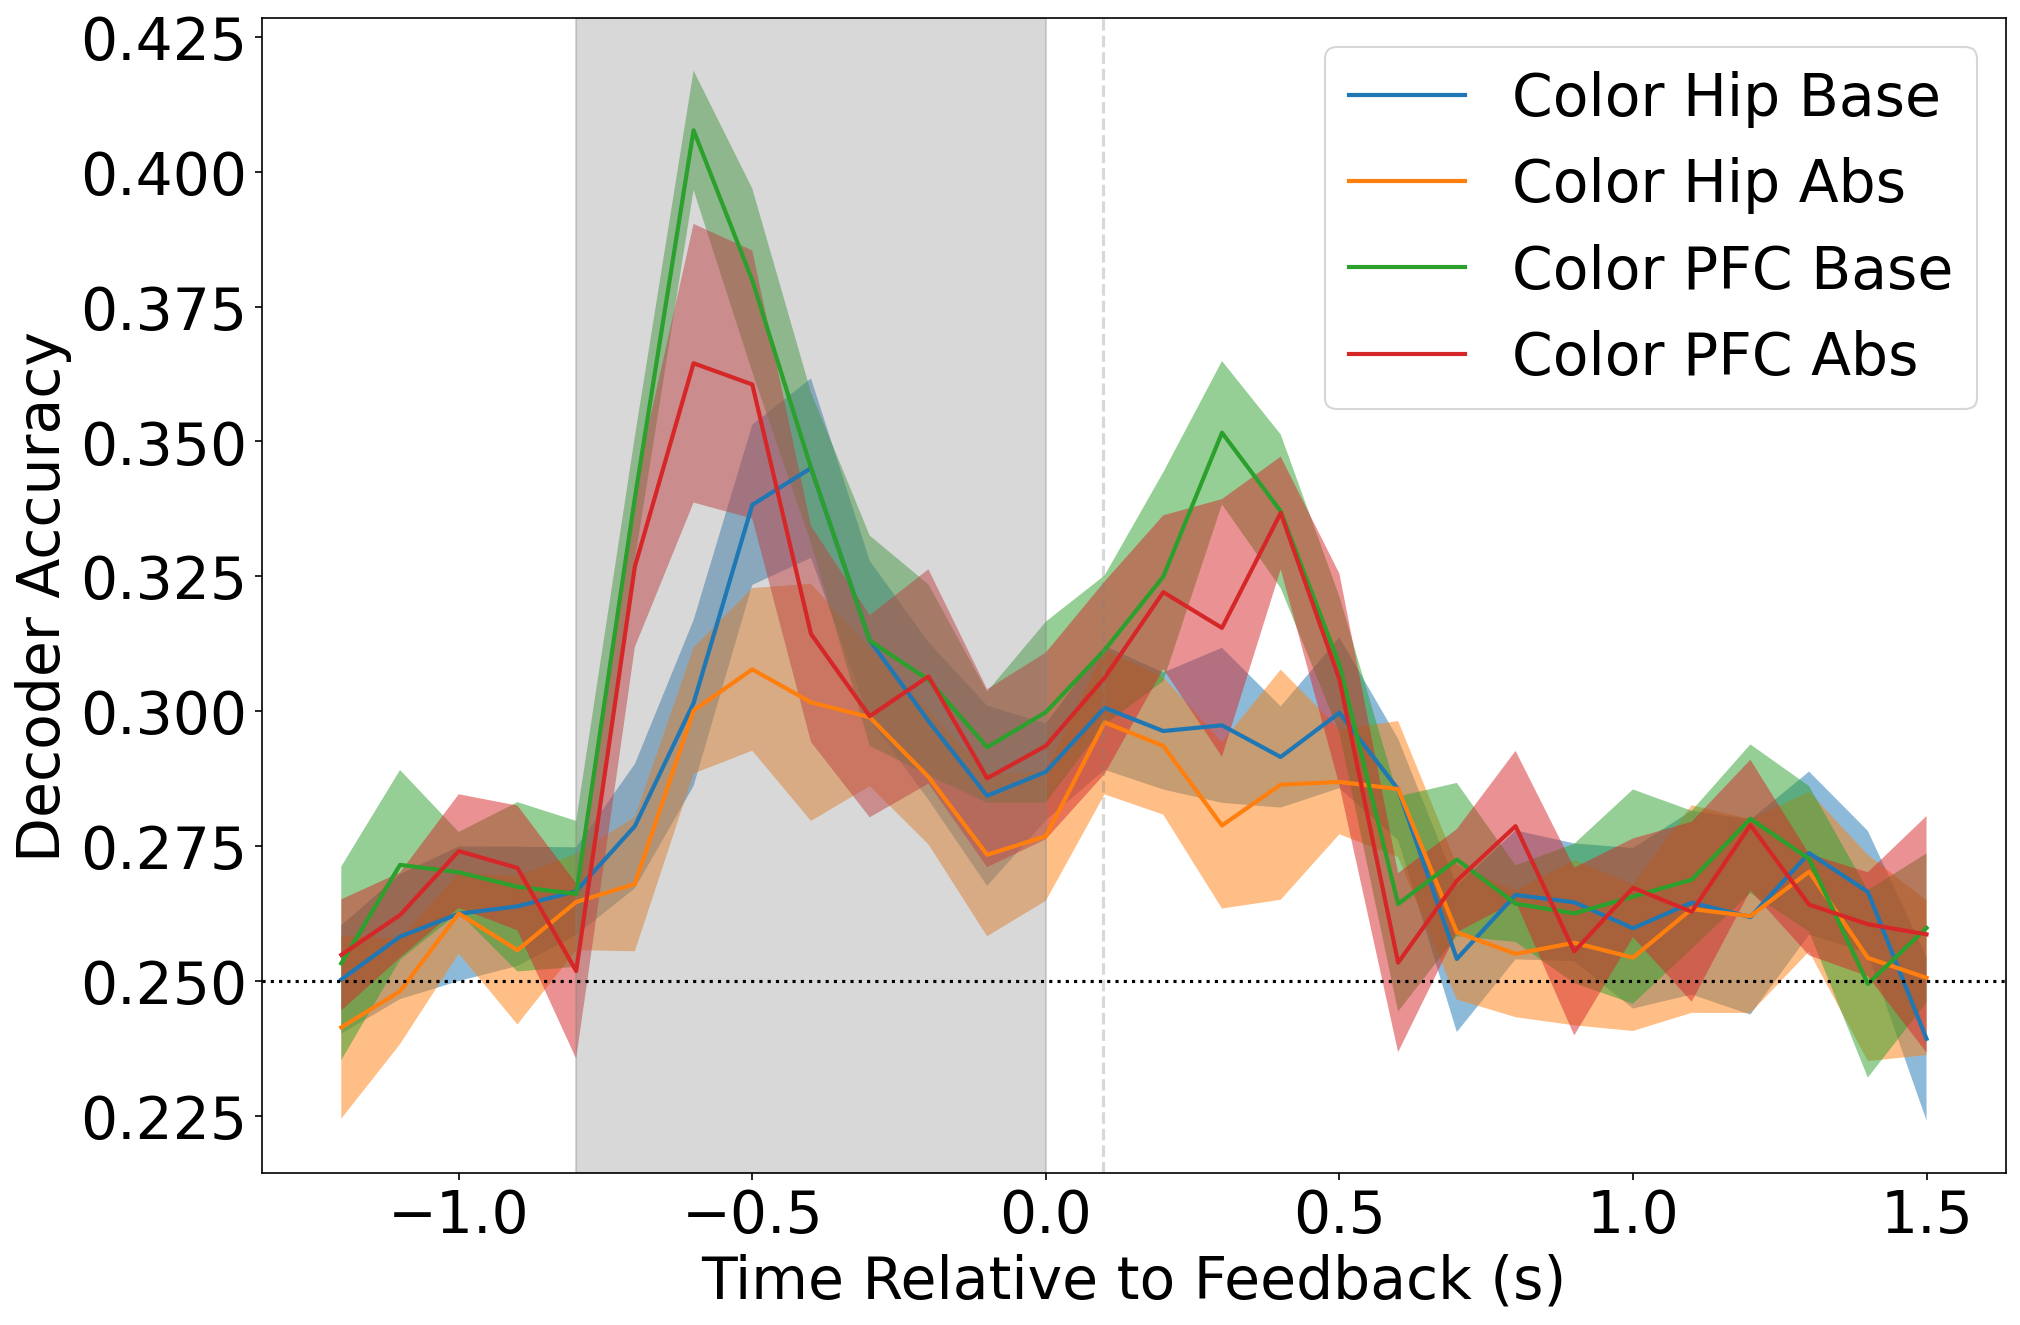

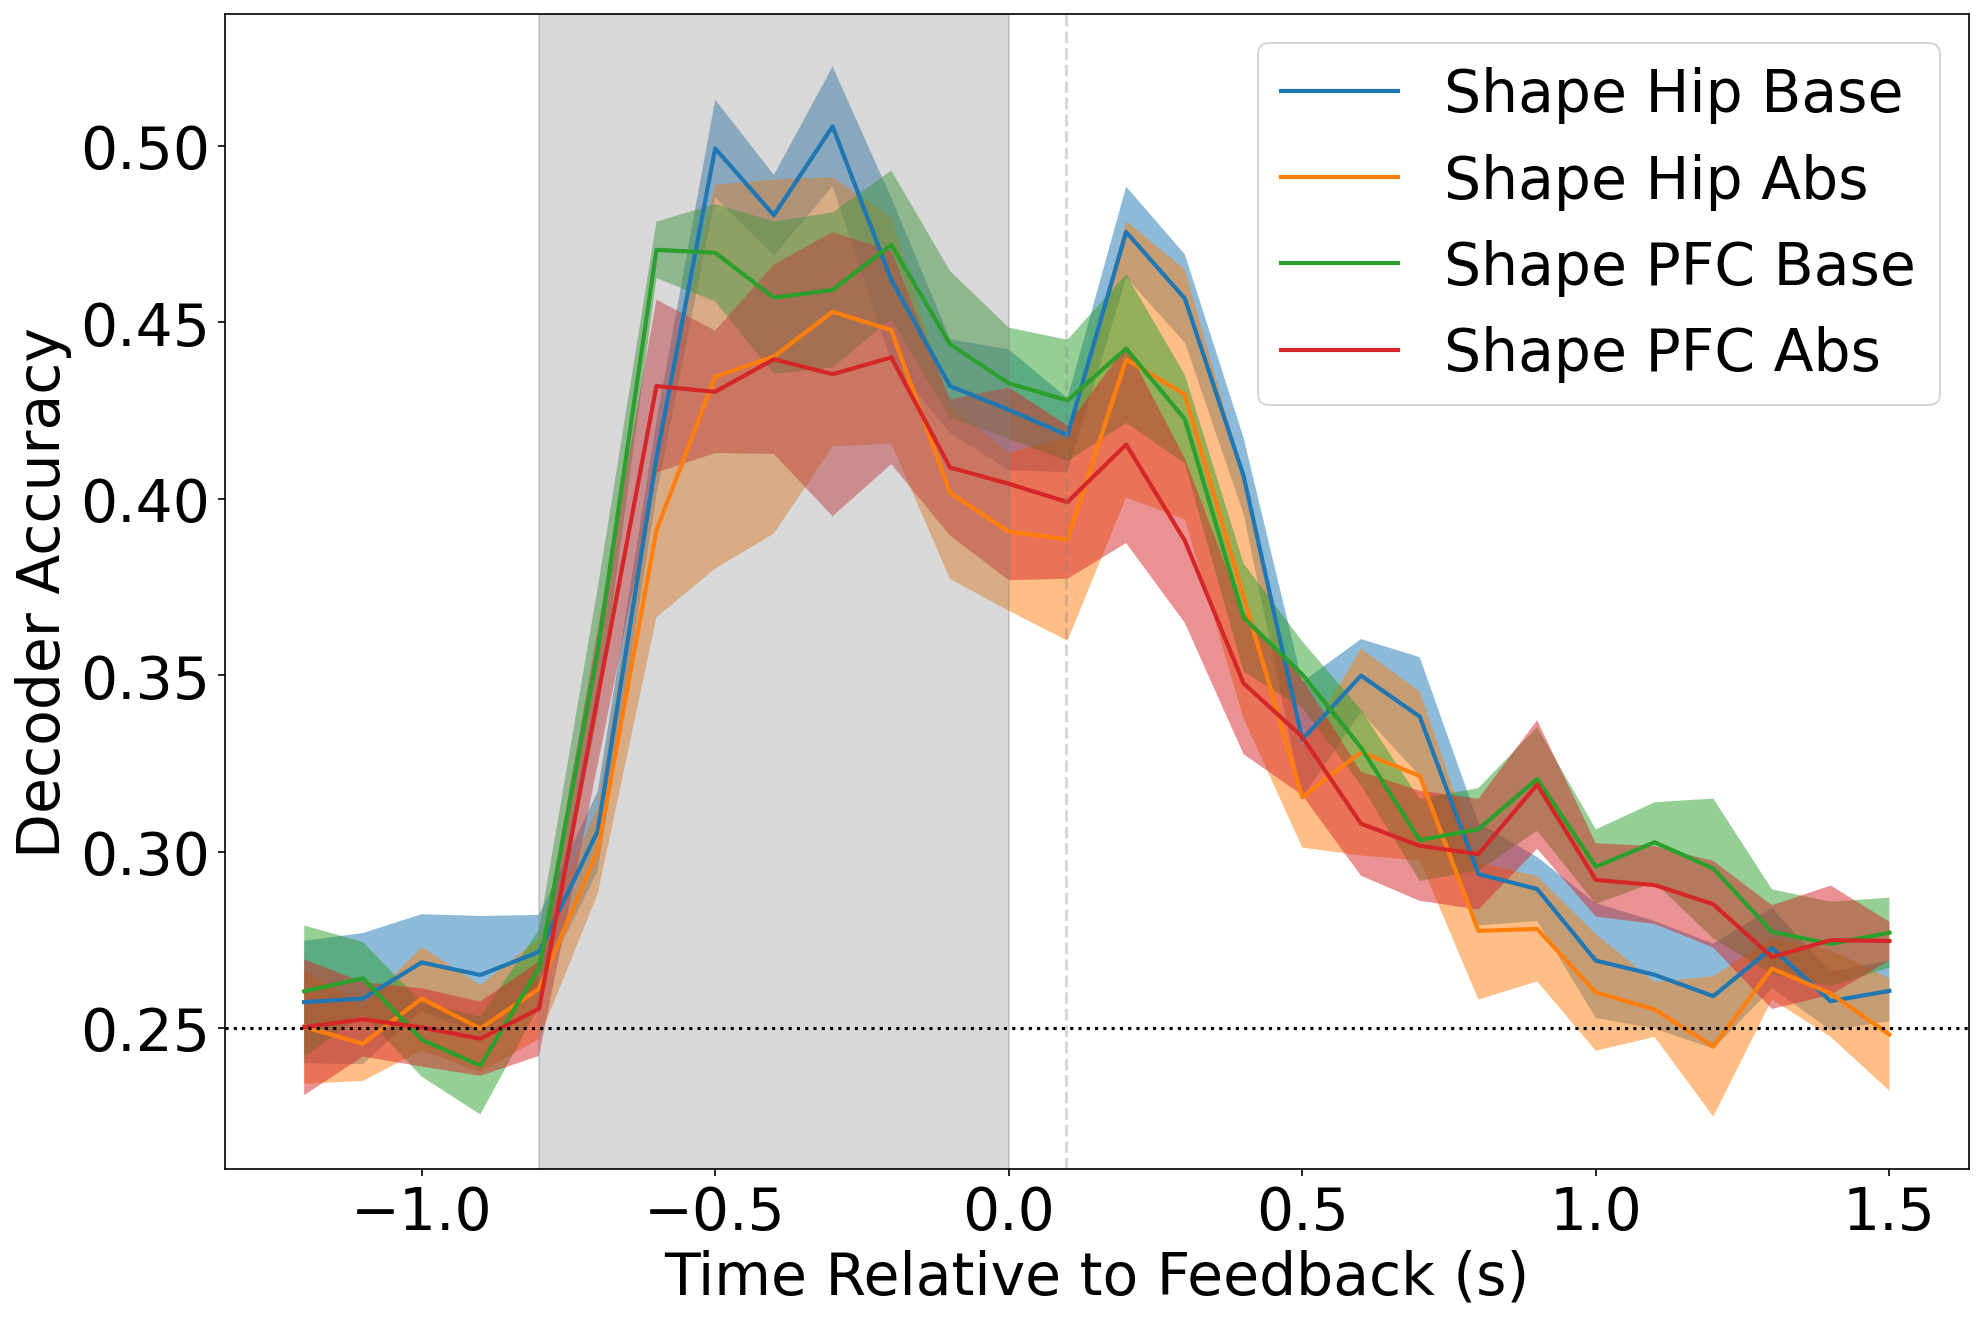

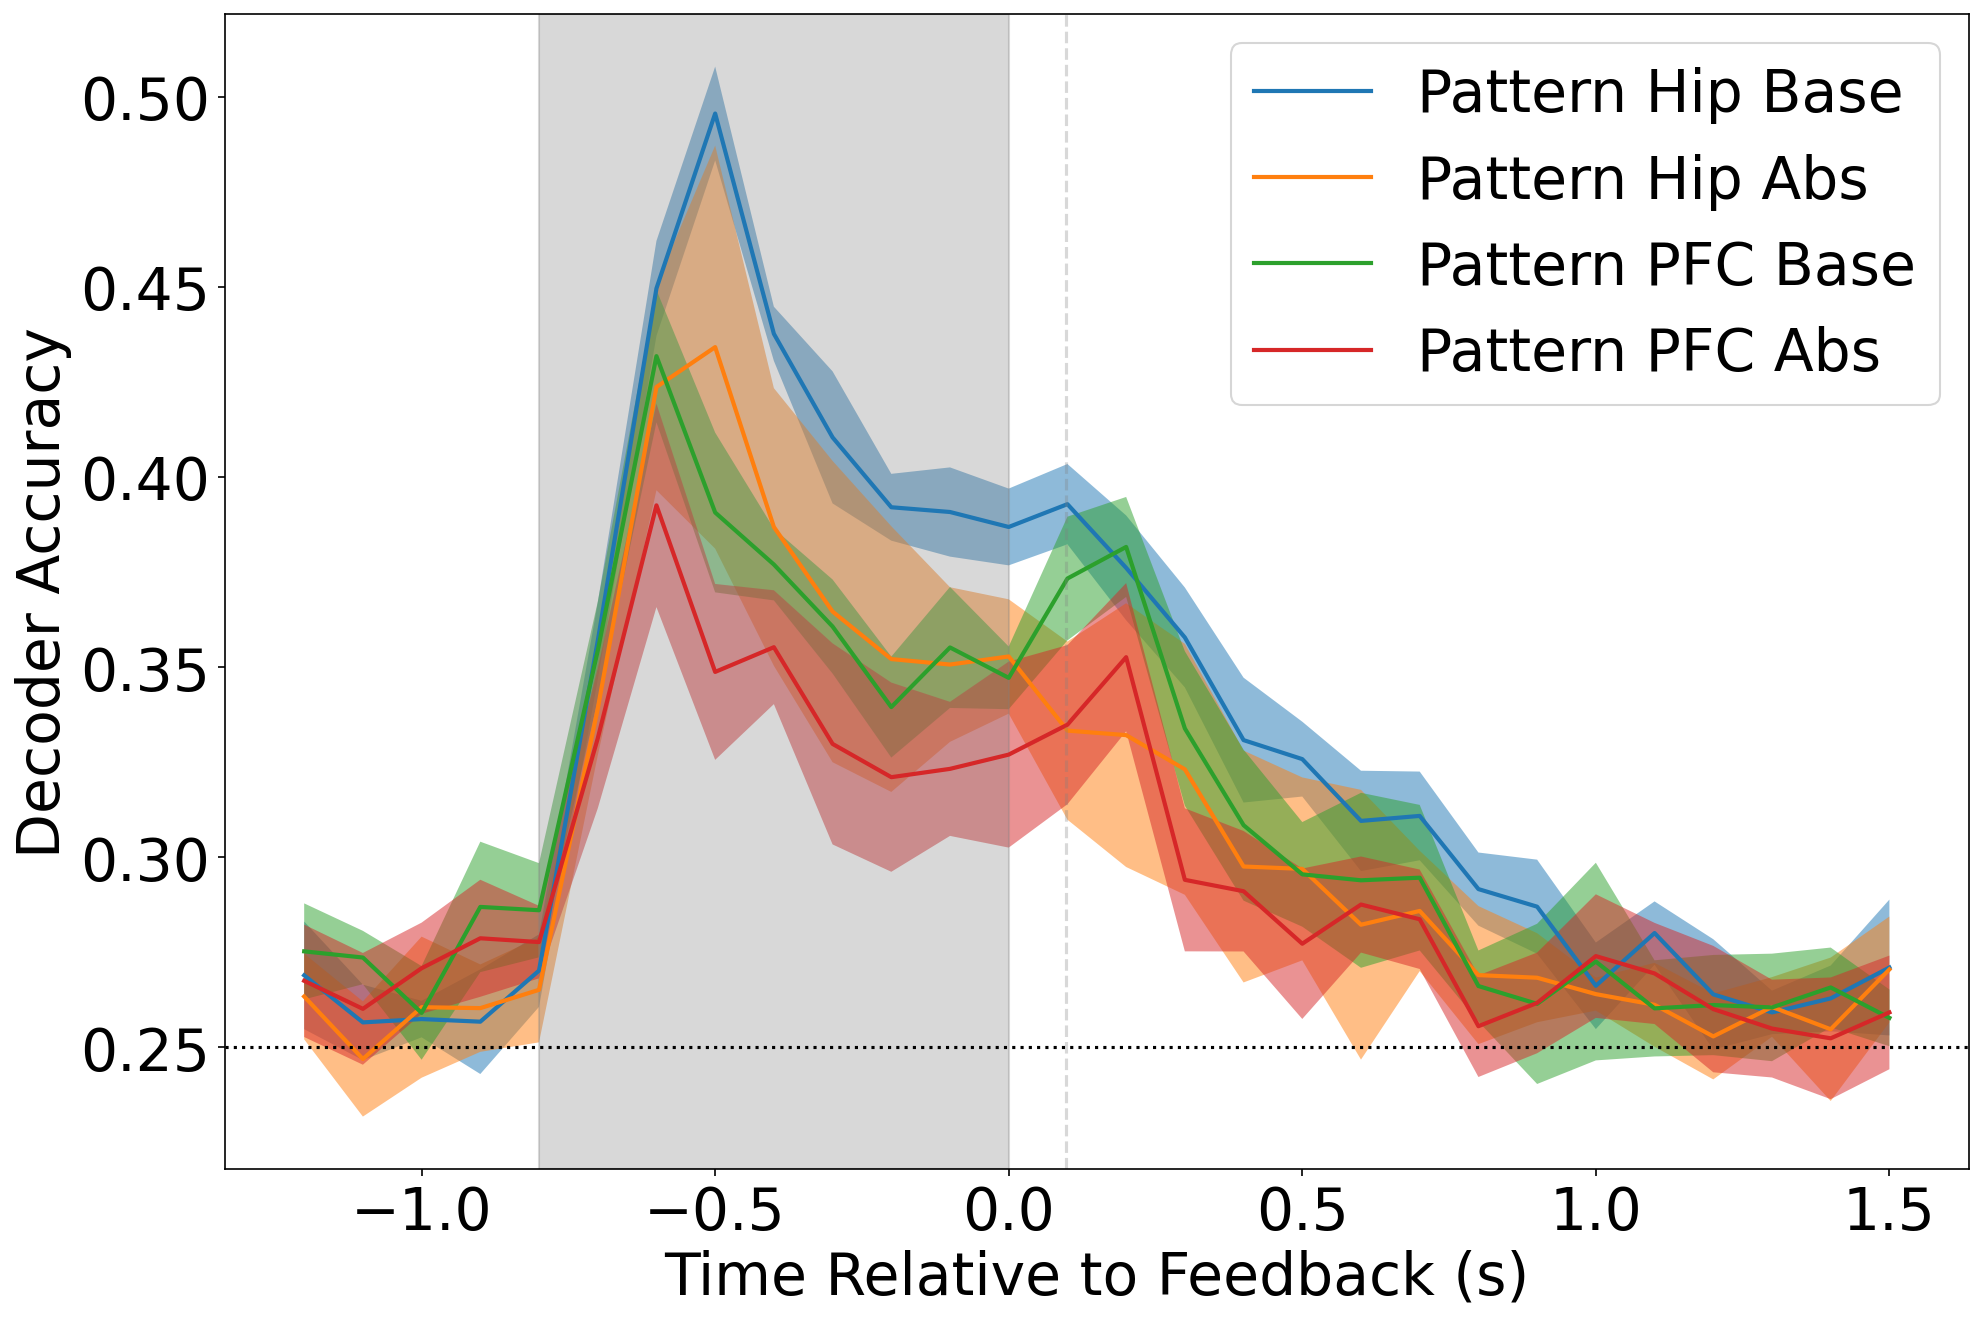

In [4]:
matplotlib.rcParams.update({'font.size': 28})
for feature_dim in FEATURE_DIMS:
    fig, ax = plt.subplots(dpi=150, figsize=(15, 10))

    hip_base = np.load(os.path.join(HYAK_OUTPUT_DIR, f"{feature_dim}_baseline_hip_test_accs.npy"))
    hip_abs = np.load(os.path.join(HYAK_OUTPUT_DIR, f"{feature_dim}_abstract_hip_test_accs.npy"))
    pfc_base = np.load(os.path.join(HYAK_OUTPUT_DIR, f"{feature_dim}_baseline_pfc_test_accs.npy"))
    pfc_abs = np.load(os.path.join(HYAK_OUTPUT_DIR, f"{feature_dim}_abstract_pfc_test_accs.npy"))

    visualization_utils.visualize_accuracy_across_time_bins(
        hip_base,
        PRE_INTERVAL / 1000, POST_INTERVAL / 1000, INTERVAL_SIZE / 1000,  # by default these are in seconds
        ax,
        label=f"{feature_dim} Hip Base",
        right_align=True, 
    )
    visualization_utils.visualize_accuracy_across_time_bins(
        hip_abs,
        PRE_INTERVAL / 1000, POST_INTERVAL / 1000, INTERVAL_SIZE / 1000,  # by default these are in seconds
        ax,
        label=f"{feature_dim} Hip Abs",
        right_align=True, 
    )

    visualization_utils.visualize_accuracy_across_time_bins(
        pfc_base,
        PRE_INTERVAL / 1000, POST_INTERVAL / 1000, INTERVAL_SIZE / 1000,  # by default these are in seconds
        ax,
        label=f"{feature_dim} PFC Base",
        right_align=True, 
    )
    visualization_utils.visualize_accuracy_across_time_bins(
        pfc_abs,
        PRE_INTERVAL / 1000, POST_INTERVAL / 1000, INTERVAL_SIZE / 1000,  # by default these are in seconds
        ax,
        label=f"{feature_dim} PFC Abs",
        right_align=True, 
    )

    ax.legend()
    # add grey band for selection period
    ax.axvspan(-0.8, 0, alpha=0.3, color='gray')
    # add dotted line for feedback start
    ax.axvline(0.098, alpha=0.3, color='gray', linestyle='dashed')
    # add estimated chance
    ax.axhline(0.25, color='black', linestyle='dotted', label="Estimated Chance")
    ax.set_xlabel("Time Relative to Feedback (s)")
    ax.set_ylabel("Decoder Accuracy")

### What about by confidence?

In [ ]:
matplotlib.rcParams.update({'font.size': 24})
for feature_dim in FEATURE_DIMS:
    fig, ax = plt.subplots(dpi=150, figsize=(15, 10))

    high_conf_base = np.load(os.path.join(HYAK_OUTPUT_DIR, f"{feature_dim}_baseline_all_high_conf_test_accs.npy"))
    high_conf_abs = np.load(os.path.join(HYAK_OUTPUT_DIR, f"{feature_dim}_abstract_all_high_conf_test_accs.npy"))
    low_conf_base = np.load(os.path.join(HYAK_OUTPUT_DIR, f"{feature_dim}_baseline_all_low_conf_test_accs.npy"))
    low_conf_abs = np.load(os.path.join(HYAK_OUTPUT_DIR, f"{feature_dim}_abstract_all_low_conf_test_accs.npy"))

    # visualization_utils.visualize_accuracy_across_time_bins(
    #     high_conf_base,
    #     PRE_INTERVAL / 1000, POST_INTERVAL / 1000, INTERVAL_SIZE / 1000,  # by default these are in seconds
    #     ax,
    #     label=f"{feature_dim} High Conf Base",
    #     right_align=True, 
    # )
    visualization_utils.visualize_accuracy_across_time_bins(
        high_conf_abs,
        PRE_INTERVAL / 1000, POST_INTERVAL / 1000, INTERVAL_SIZE / 1000,  # by default these are in seconds
        ax,
        label=f"{feature_dim} High Conf Abs",
        right_align=True, 
    )

    # visualization_utils.visualize_accuracy_across_time_bins(
    #     low_conf_base,
    #     PRE_INTERVAL / 1000, POST_INTERVAL / 1000, INTERVAL_SIZE / 1000,  # by default these are in seconds
    #     ax,
    #     label=f"{feature_dim} Low Conf Base",
    #     right_align=True, 
    # )
    visualization_utils.visualize_accuracy_across_time_bins(
        low_conf_abs,
        PRE_INTERVAL / 1000, POST_INTERVAL / 1000, INTERVAL_SIZE / 1000,  # by default these are in seconds
        ax,
        label=f"{feature_dim} Low Conf Abs",
        right_align=True, 
    )

    ax.legend()
    # add grey band for selection period
    ax.axvspan(-0.8, 0, alpha=0.3, color='gray')
    # add dotted line for feedback start
    ax.axvline(0.098, alpha=0.3, color='gray', linestyle='dashed')
    # add estimated chance
    ax.axhline(0.25, color='black', linestyle='dotted', label="Estimated Chance")
    ax.set_xlabel("Time Relative to Feedback (s)")
    ax.set_ylabel("Decoder Accuracy")

### Look at subpopulation, split by correct incorrect

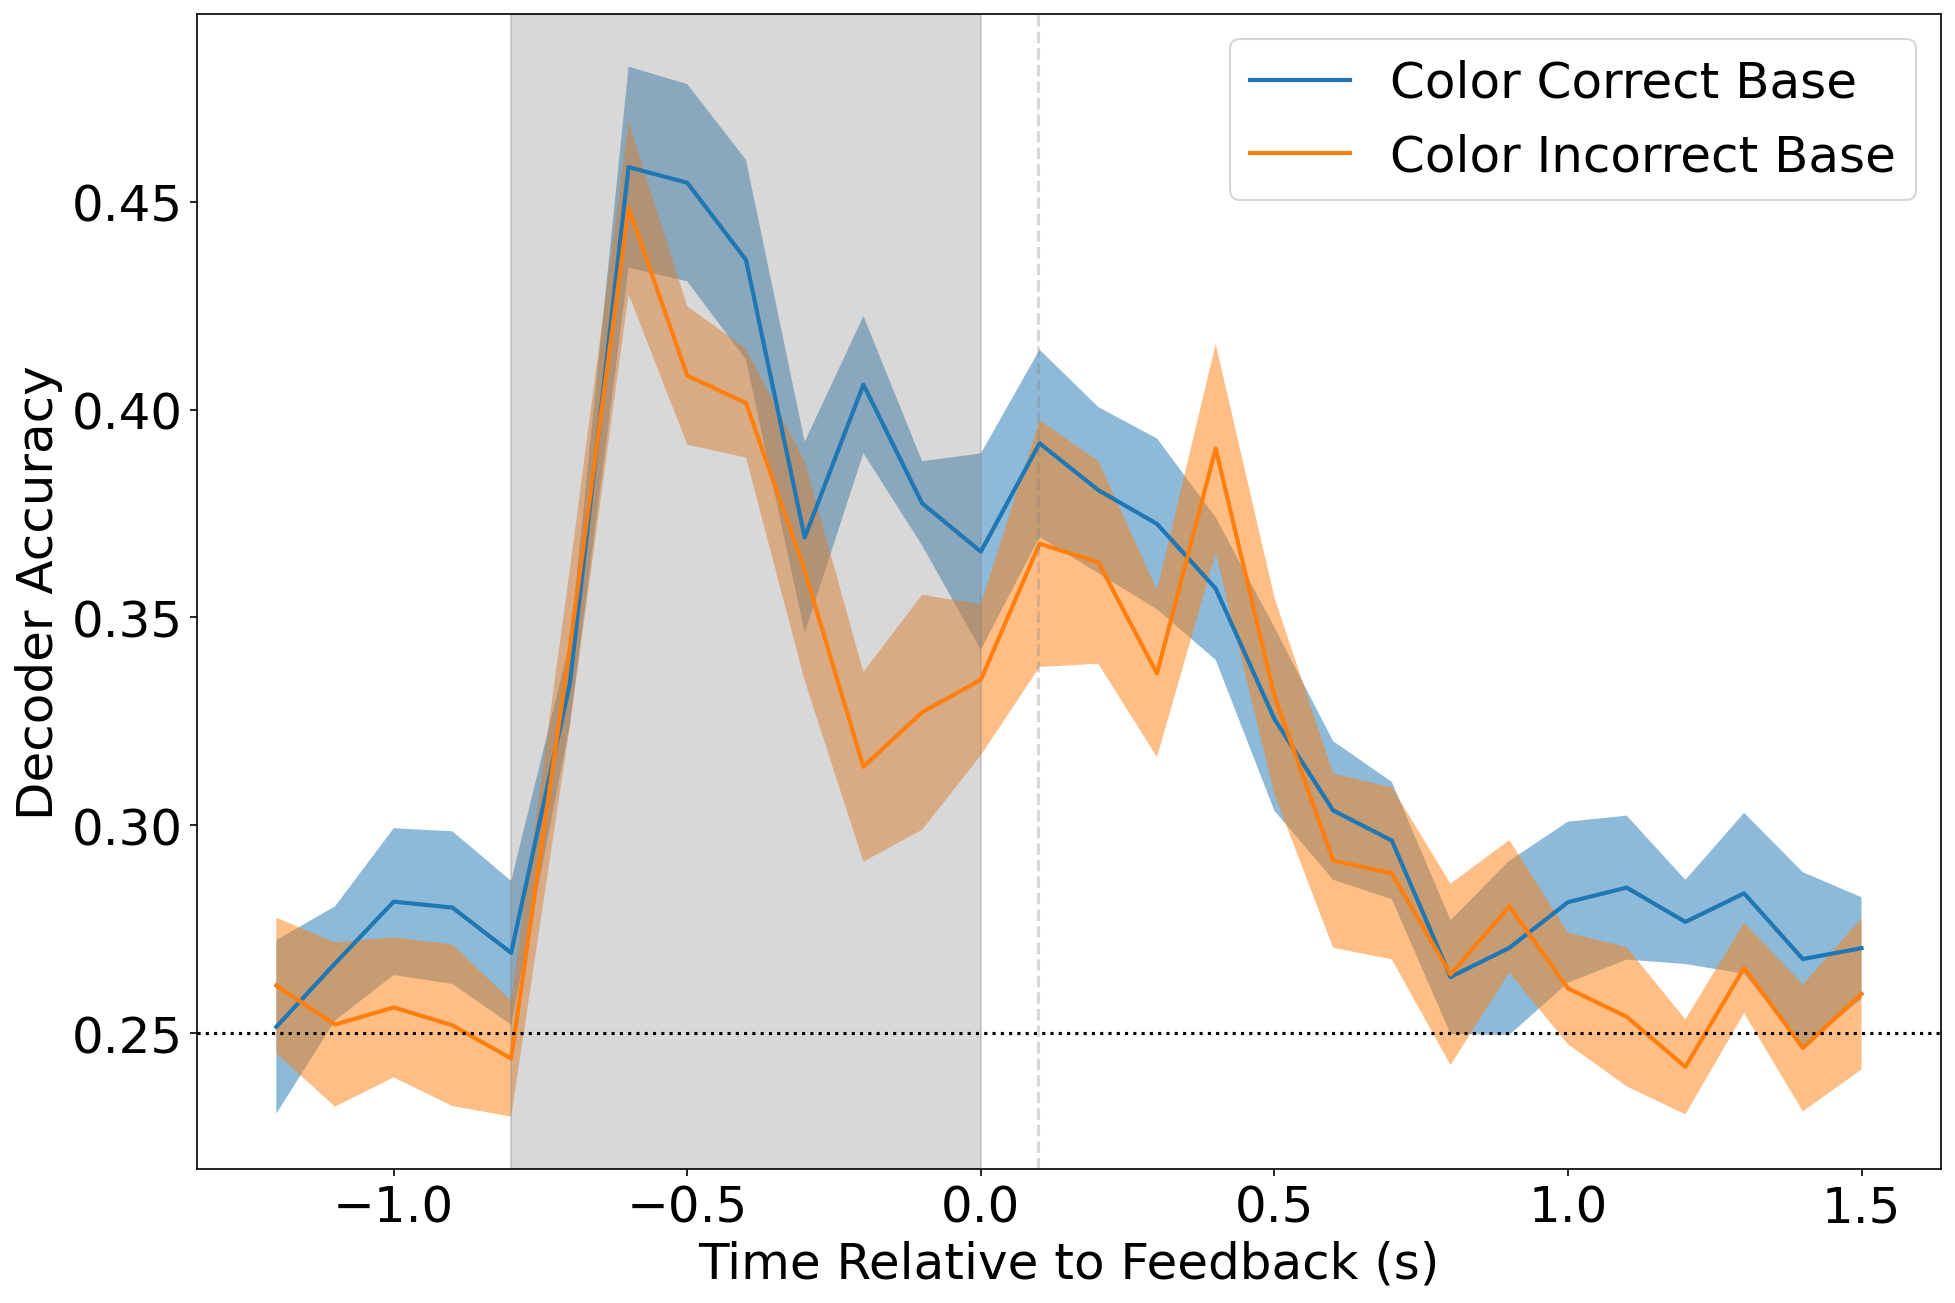

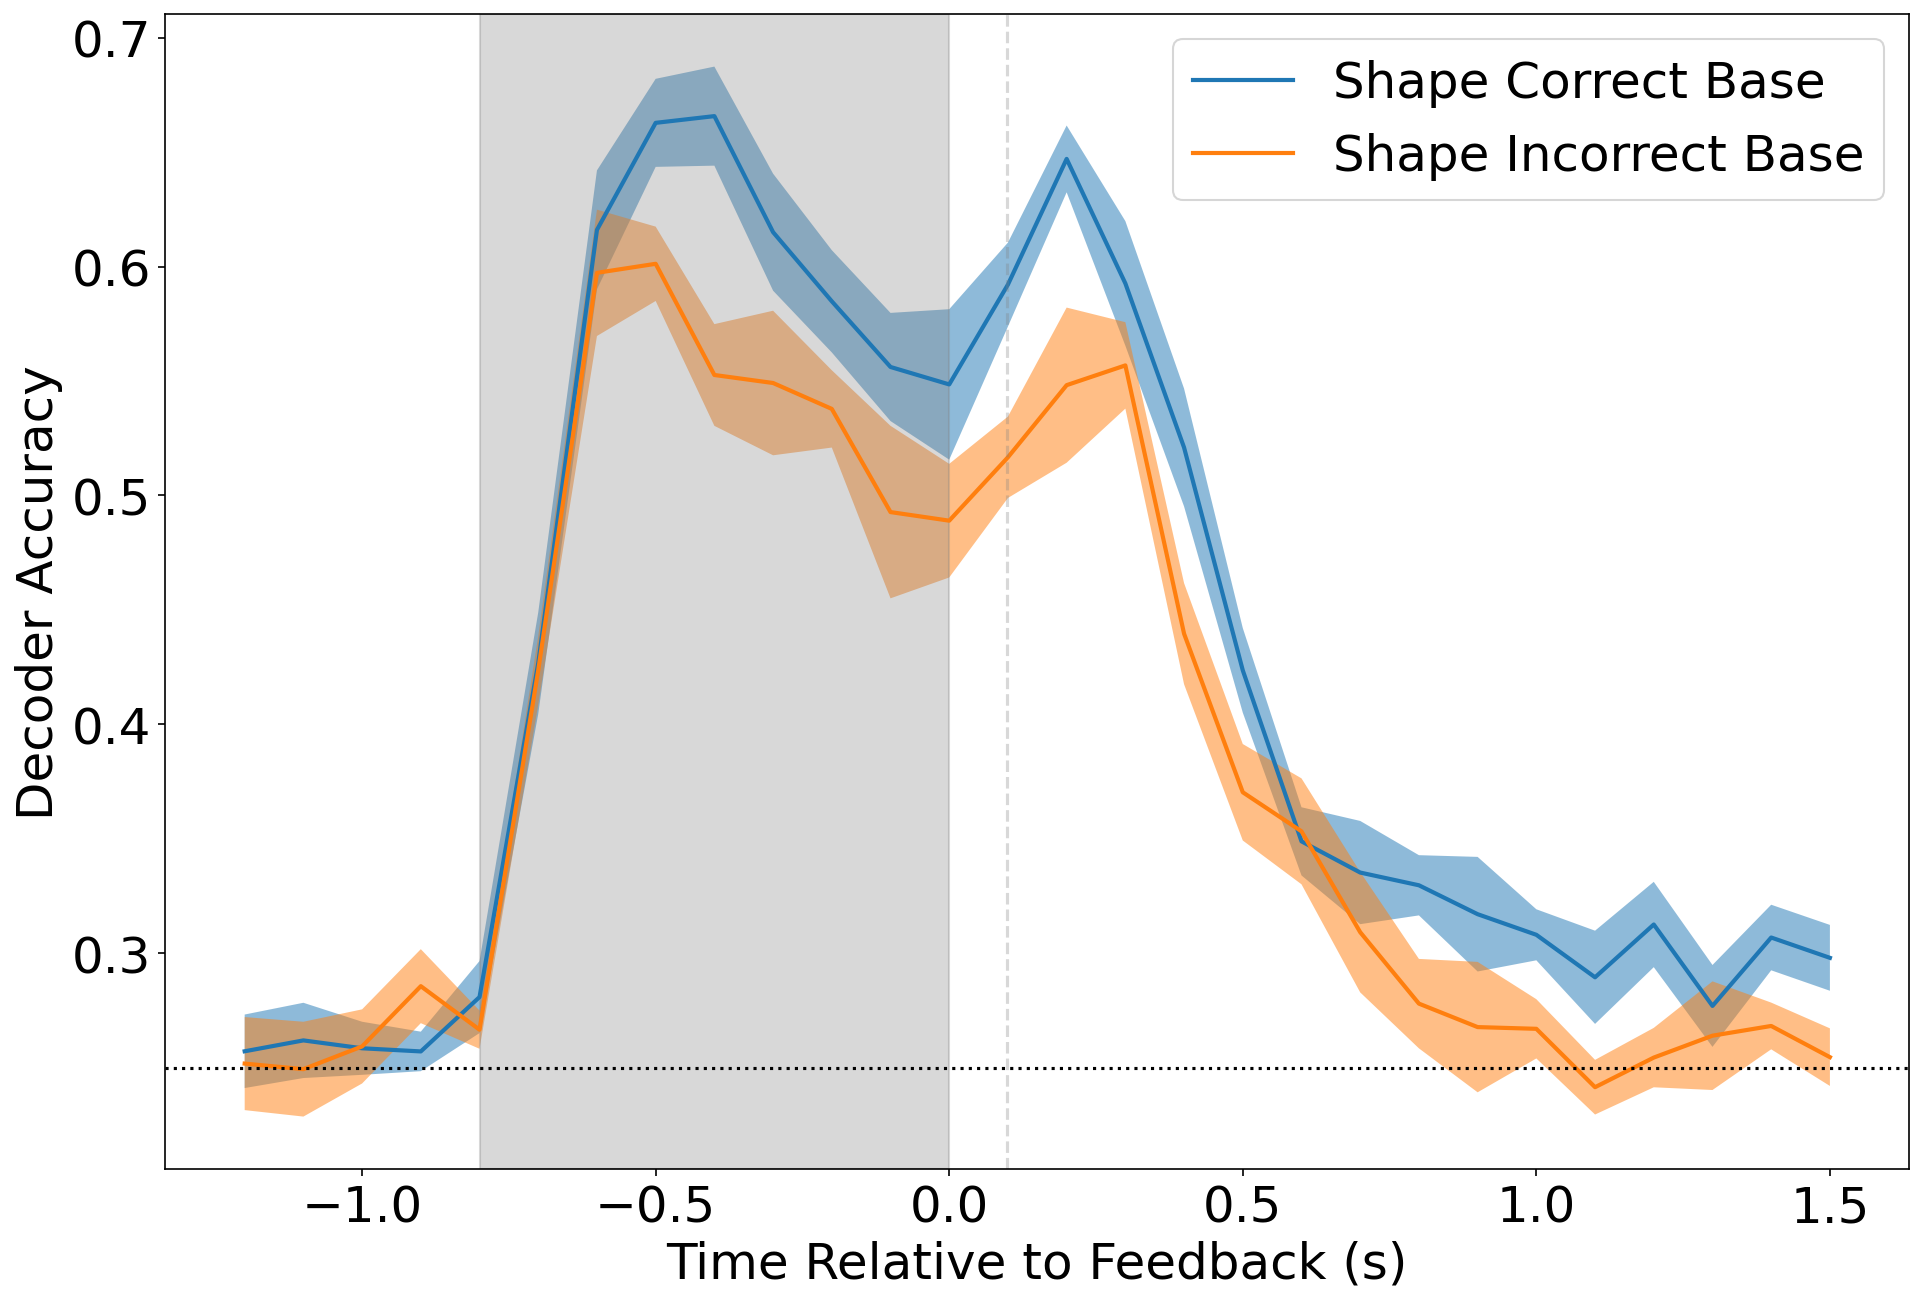

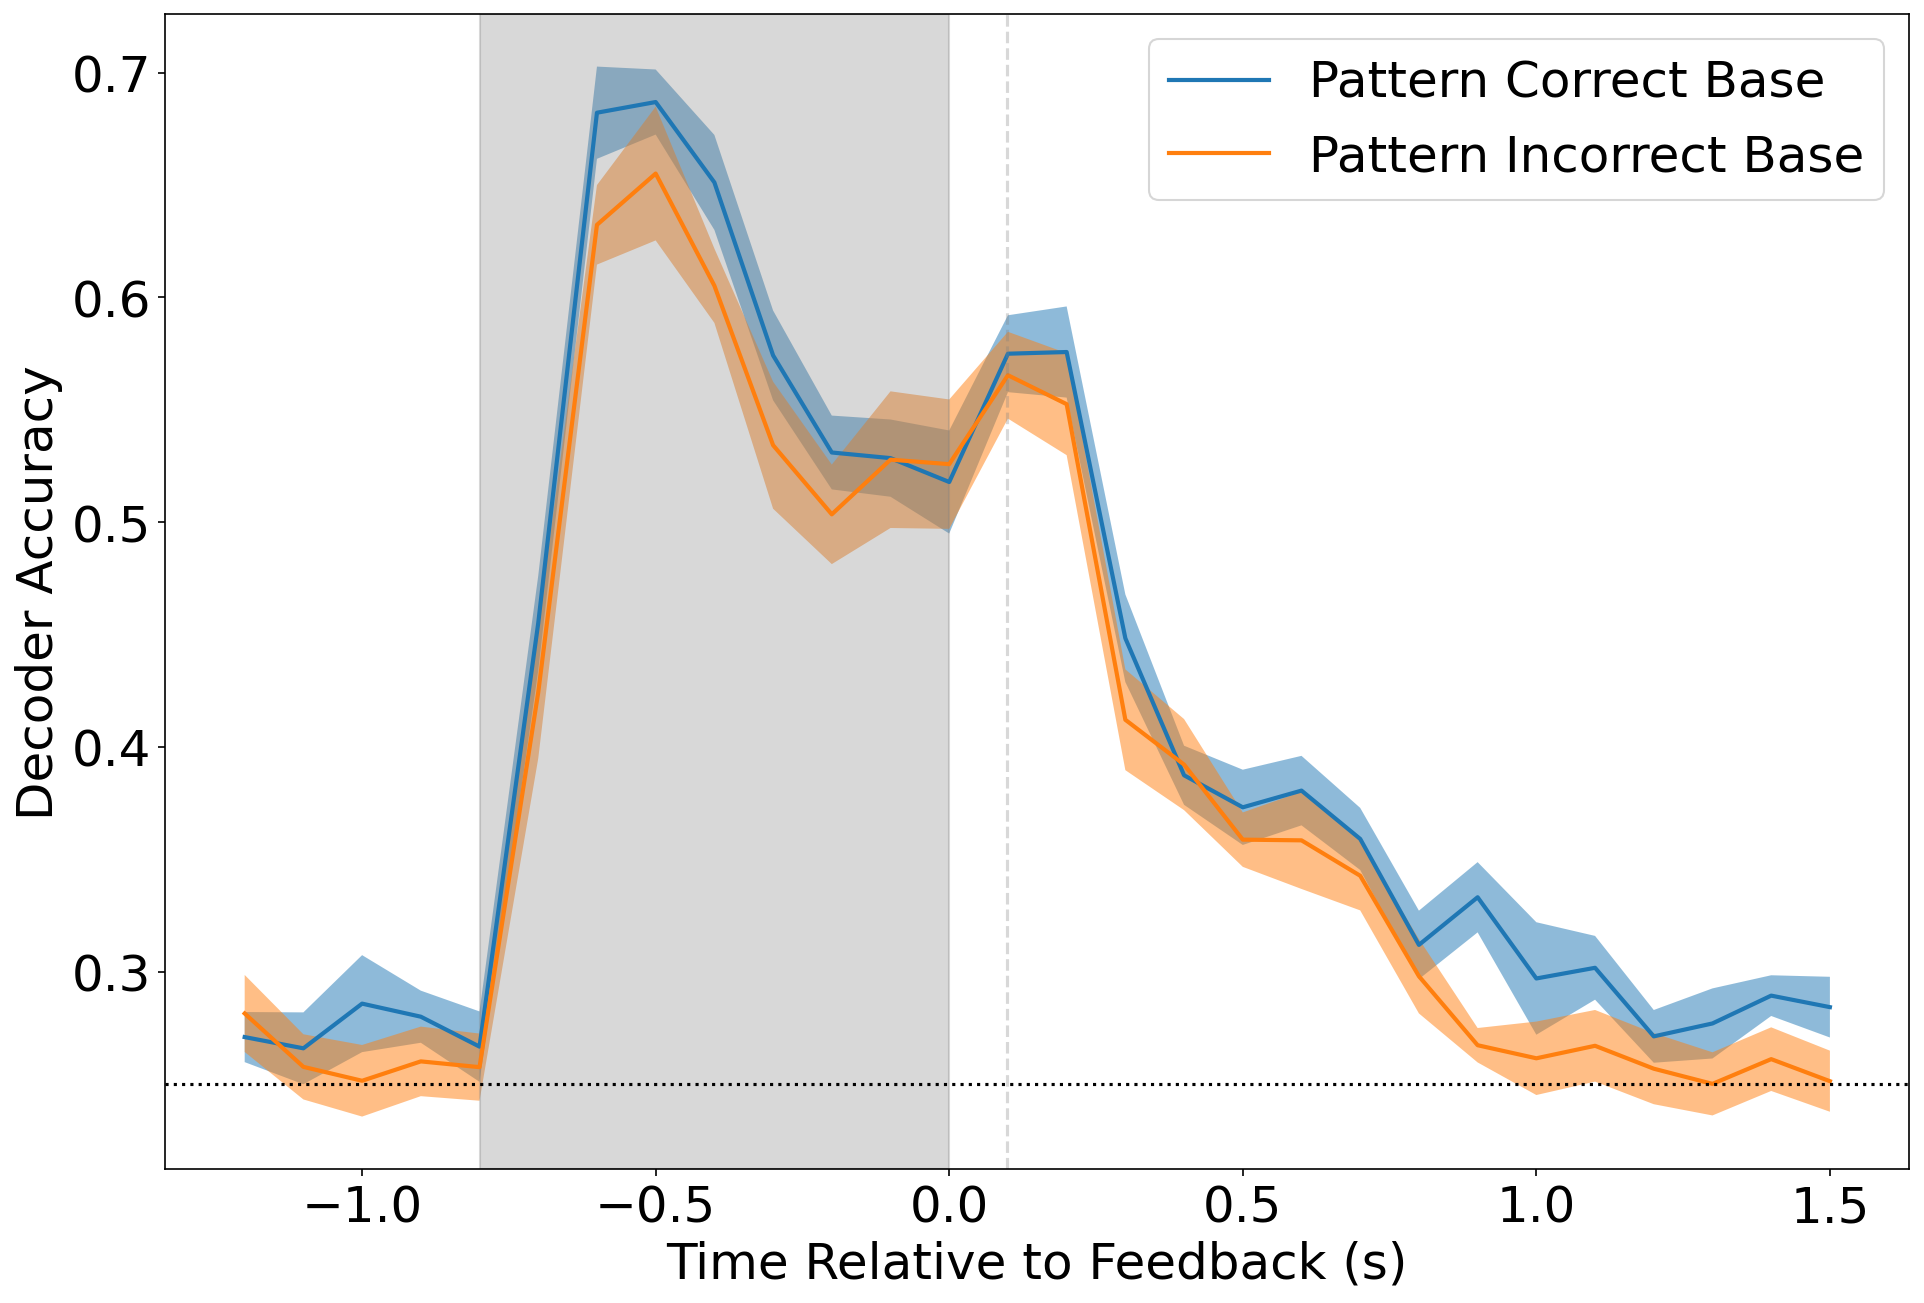

In [3]:
matplotlib.rcParams.update({'font.size': 24})
for feature_dim in FEATURE_DIMS:
    fig, ax = plt.subplots(dpi=150, figsize=(15, 10))

    cor_base = np.load(os.path.join(HYAK_OUTPUT_DIR, f"{feature_dim}_baseline_state_update_cor_test_accs.npy"))
    inc_base = np.load(os.path.join(HYAK_OUTPUT_DIR, f"{feature_dim}_baseline_state_update_inc_test_accs.npy"))
    cor_abs = np.load(os.path.join(HYAK_OUTPUT_DIR, f"{feature_dim}_abstract_state_update_cor_test_accs.npy"))
    inc_abs = np.load(os.path.join(HYAK_OUTPUT_DIR, f"{feature_dim}_abstract_state_update_inc_test_accs.npy"))

    visualization_utils.visualize_accuracy_across_time_bins(
        cor_base,
        PRE_INTERVAL / 1000, POST_INTERVAL / 1000, INTERVAL_SIZE / 1000,  # by default these are in seconds
        ax,
        label=f"{feature_dim} Correct Base",
        right_align=True, 
    )
    visualization_utils.visualize_accuracy_across_time_bins(
        inc_base,
        PRE_INTERVAL / 1000, POST_INTERVAL / 1000, INTERVAL_SIZE / 1000,  # by default these are in seconds
        ax,
        label=f"{feature_dim} Incorrect Base",
        right_align=True, 
    )
    # visualization_utils.visualize_accuracy_across_time_bins(
    #     cor_abs,
    #     PRE_INTERVAL / 1000, POST_INTERVAL / 1000, INTERVAL_SIZE / 1000,  # by default these are in seconds
    #     ax,
    #     label=f"{feature_dim} Abstract Correct",
    #     right_align=True, 
    # )
    # visualization_utils.visualize_accuracy_across_time_bins(
    #     inc_abs,
    #     PRE_INTERVAL / 1000, POST_INTERVAL / 1000, INTERVAL_SIZE / 1000,  # by default these are in seconds
    #     ax,
    #     label=f"{feature_dim} Abstract Incorrect",
    #     right_align=True, 
    # )

    ax.legend()
    # add grey band for selection period
    ax.axvspan(-0.8, 0, alpha=0.3, color='gray')
    # add dotted line for feedback start
    ax.axvline(0.098, alpha=0.3, color='gray', linestyle='dashed')
    # add estimated chance
    ax.axhline(0.25, color='black', linestyle='dotted', label="Estimated Chance")
    ax.set_xlabel("Time Relative to Feedback (s)")
    ax.set_ylabel("Decoder Accuracy")

In [4]:
valid_sess = pd.read_pickle(SESSIONS_PATH)
positions = spike_utils.get_unit_positions(valid_sess)
positions = positions[positions.manual_structure != "unknown"]

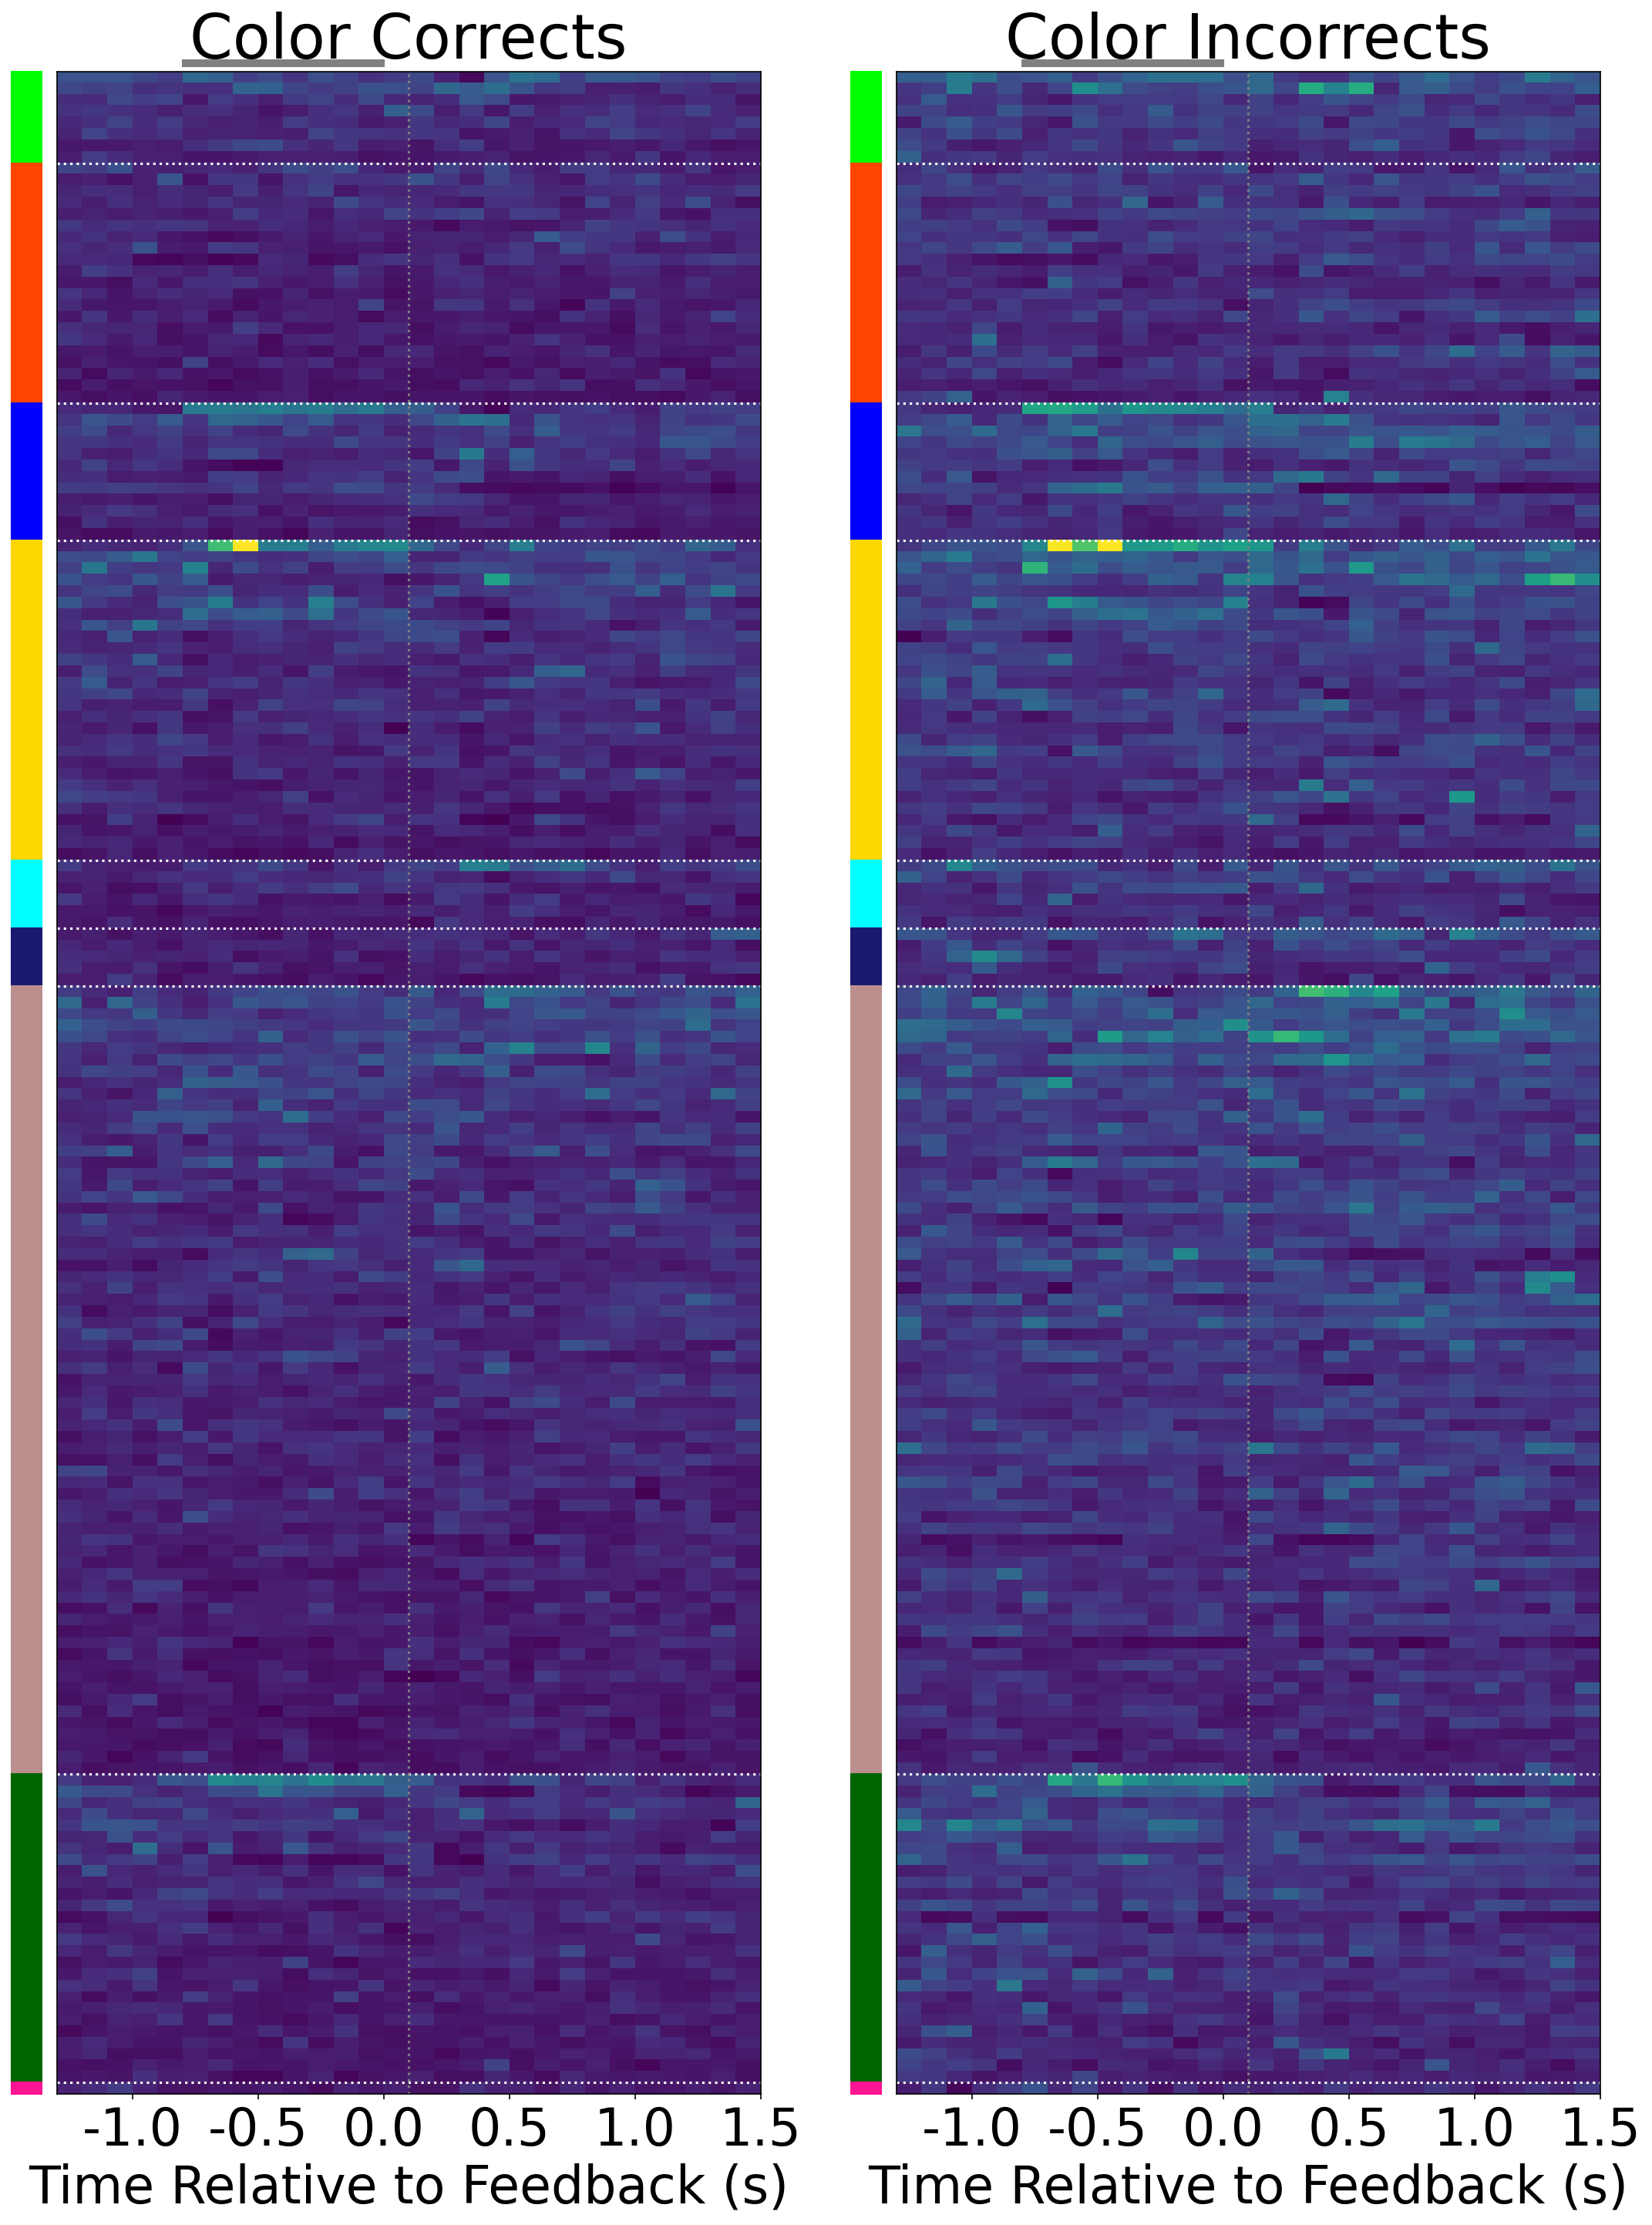

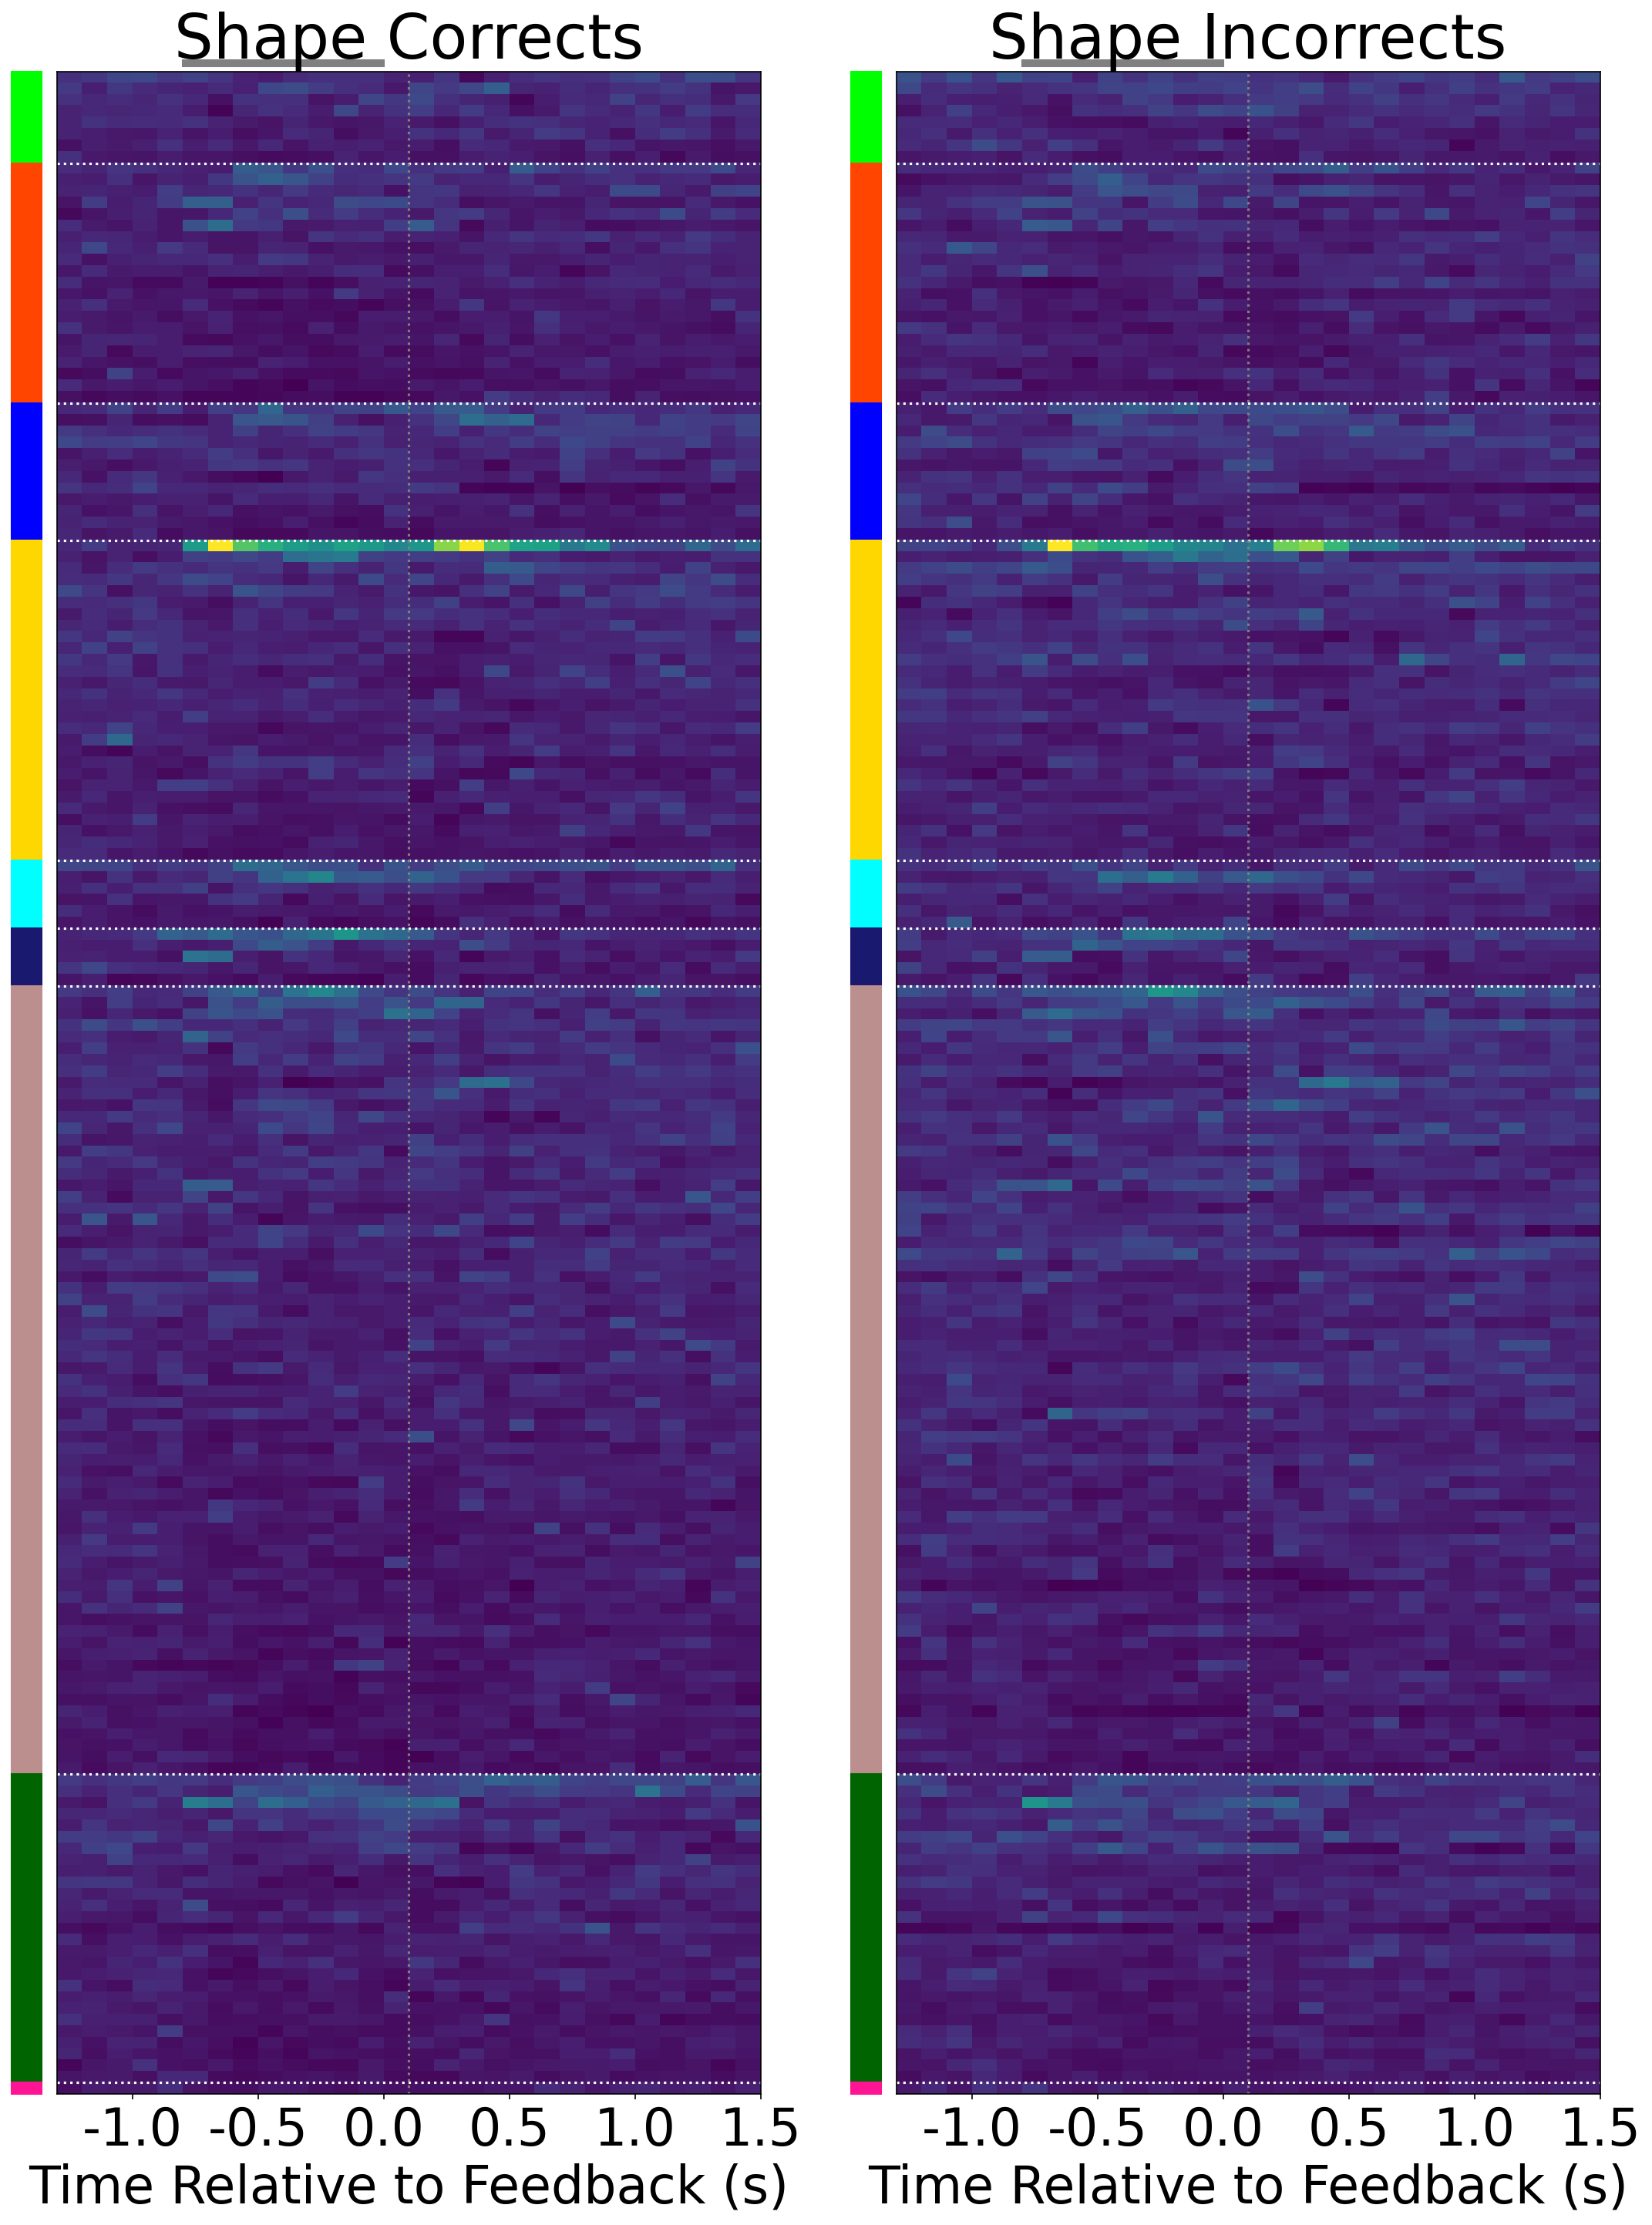

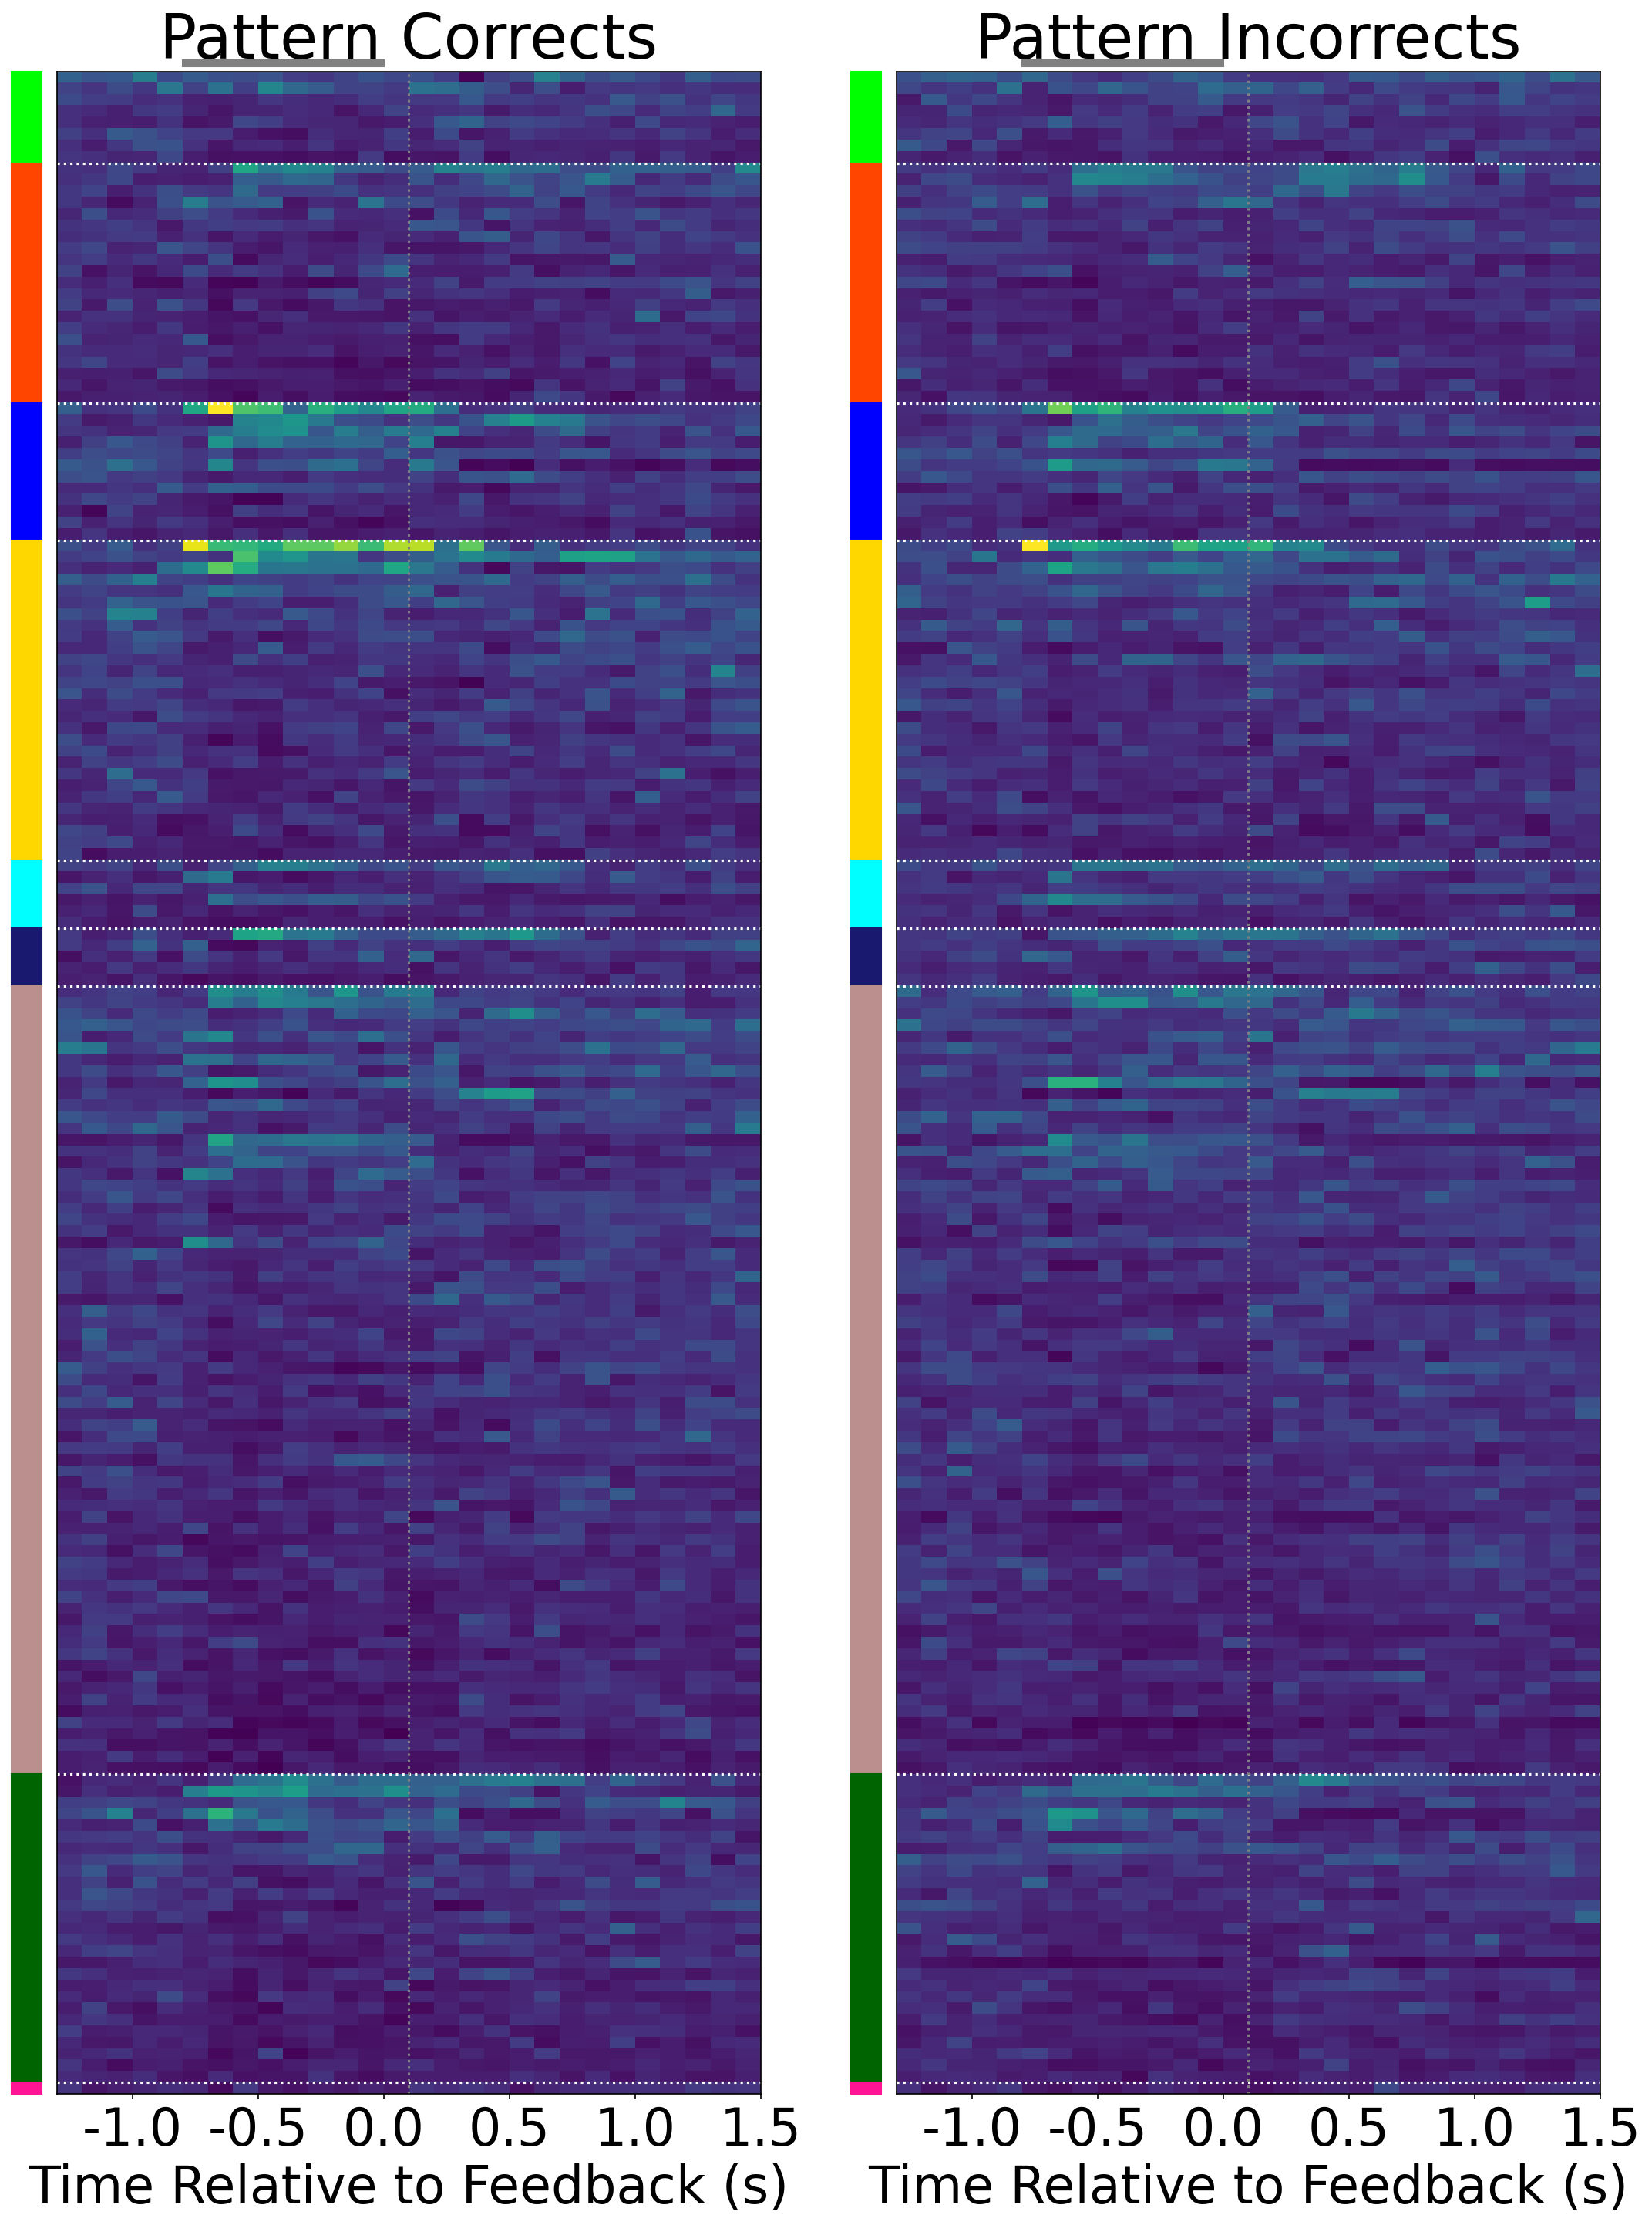

In [7]:
matplotlib.rcParams.update({'font.size': 32})
for i, feature_dim in enumerate(FEATURE_DIMS):
    cor_models = np.load(os.path.join(HYAK_OUTPUT_DIR, f"{feature_dim}_baseline_state_update_cor_models.npy"), allow_pickle=True)
    inc_models = np.load(os.path.join(HYAK_OUTPUT_DIR, f"{feature_dim}_baseline_state_update_inc_models.npy"), allow_pickle=True)
    # cor_models = np.load(os.path.join(OUTPUT_DIR, f"{feature_dim}_Correct_models.npy"), allow_pickle=True)
    # inc_models = np.load(os.path.join(OUTPUT_DIR, f"{feature_dim}_Incorrect_models.npy"), allow_pickle=True)

    # evaluate weights by time. Pass in number of neurons and number of classes
    cor_weights = classifier_utils.evaluate_model_weights_by_time_bins(cor_models, num_neurons=177, num_classes=4)
    inc_weights = classifier_utils.evaluate_model_weights_by_time_bins(inc_models, num_neurons=177, num_classes=4)

    norm_cor_weights = cor_weights / np.sum(cor_weights, axis=0)
    norm_inc_weights = inc_weights / np.sum(inc_weights, axis=0)

    means = np.mean(norm_cor_weights, axis=1)
    ordering_df = pd.DataFrame({'np_idx': np.arange(len(means)), 'weight': means})
    fig, axs = plt.subplots(1, 2, figsize=(15, 20), dpi=150, sharex=True)
    visualization_utils.visualize_weights(
        positions, 
        norm_cor_weights, 
        "manual_structure", 
        name_to_color=visualization_utils.REGION_TO_COLOR, 
        add_region=True, 
        mean_weights_df=ordering_df,
        ax=axs[0]
    )
    axs[0].set_title(f"{feature_dim} Corrects")
    visualization_utils.visualize_weights(
        positions, 
        norm_inc_weights, 
        "manual_structure", 
        name_to_color=visualization_utils.REGION_TO_COLOR, 
        add_region=True, 
        mean_weights_df=ordering_df,
        ax=axs[1]
    )
    axs[1].set_title(f"{feature_dim} Incorrects")

# plt.xlabel("Time Relative to Feedback (s)")
    fig.tight_layout()

### Abstractness ratio?

In [ ]:
baseline_means = np.mean(baseline_accs_not, axis=1)
abstract_means = np.mean(abstract_accs_not, axis=1)

abstract_ratio = abstract_means / baseline_means
time = np.arange(-1.3, 1.5, 0.1)
fig, ax = plt.subplots()
ax.plot(time, abstract_ratio)
ax.legend()
# add grey band for selection period
ax.axvspan(-0.8, 0, alpha=0.3, color='gray')
# add dotted line for feedback start
ax.axvline(0.098, alpha=0.3, color='gray', linestyle='dashed')
# add estimated chance
ax.axhline(0.25, color='black', linestyle='dotted', label="Estimated Chance")
ax.set_xlabel("Time Relative to Feedback (s)")
ax.set_ylabel("Decoder Accuracy")

### Abstractness wrt to RPEGroup

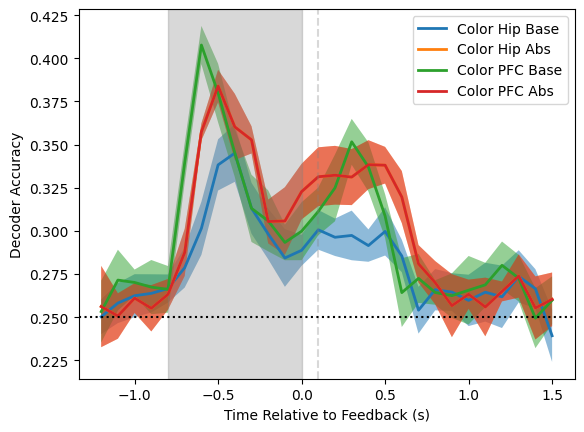

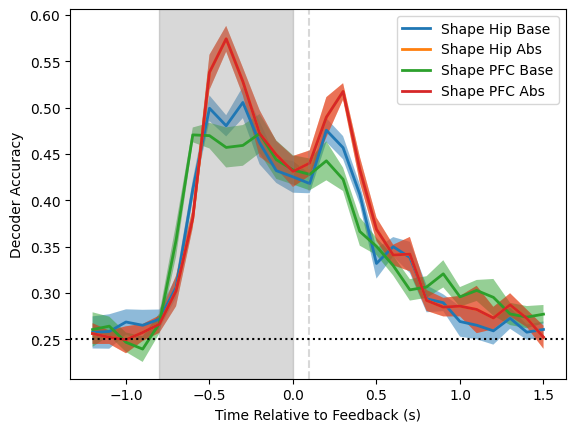

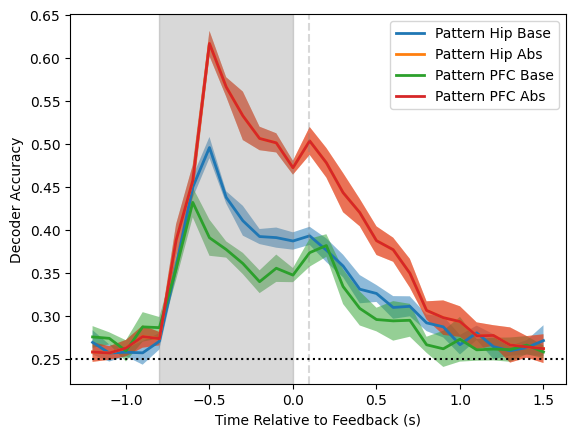

In [3]:
for feature_dim in FEATURE_DIMS:
    fig, ax = plt.subplots()
    hip_base = np.load(os.path.join(HYAK_OUTPUT_DIR, f"{feature_dim}_baseline_hip_test_accs.npy"))
    hip_abs = np.load(os.path.join(HYAK_OUTPUT_DIR, f"{feature_dim}_abs_RPEGroup_hip_all_no_proj_0.0_test_accs.npy"))
    pfc_base = np.load(os.path.join(HYAK_OUTPUT_DIR, f"{feature_dim}_baseline_pfc_test_accs.npy"))
    pfc_abs = np.load(os.path.join(HYAK_OUTPUT_DIR, f"{feature_dim}_abs_RPEGroup_hip_all_no_proj_0.0_test_accs.npy"))

    visualization_utils.visualize_accuracy_across_time_bins(
        hip_base,
        PRE_INTERVAL / 1000, POST_INTERVAL / 1000, INTERVAL_SIZE / 1000,  # by default these are in seconds
        ax,
        label=f"{feature_dim} Hip Base",
        right_align=True, 
    )
    visualization_utils.visualize_accuracy_across_time_bins(
        hip_abs,
        PRE_INTERVAL / 1000, POST_INTERVAL / 1000, INTERVAL_SIZE / 1000,  # by default these are in seconds
        ax,
        label=f"{feature_dim} Hip Abs",
        right_align=True, 
    )

    visualization_utils.visualize_accuracy_across_time_bins(
        pfc_base,
        PRE_INTERVAL / 1000, POST_INTERVAL / 1000, INTERVAL_SIZE / 1000,  # by default these are in seconds
        ax,
        label=f"{feature_dim} PFC Base",
        right_align=True, 
    )
    visualization_utils.visualize_accuracy_across_time_bins(
        pfc_abs,
        PRE_INTERVAL / 1000, POST_INTERVAL / 1000, INTERVAL_SIZE / 1000,  # by default these are in seconds
        ax,
        label=f"{feature_dim} PFC Abs",
        right_align=True, 
    )

    ax.legend()
    # add grey band for selection period
    ax.axvspan(-0.8, 0, alpha=0.3, color='gray')
    # add dotted line for feedback start
    ax.axvline(0.098, alpha=0.3, color='gray', linestyle='dashed')
    # add estimated chance
    ax.axhline(0.25, color='black', linestyle='dotted', label="Estimated Chance")
    ax.set_xlabel("Time Relative to Feedback (s)")
    ax.set_ylabel("Decoder Accuracy")